<div style="direction:rtl;line-height:300%; font-family: Yas">
    <font face="XB Zar" size=5>
        <div style="direction:rtl;line-height:300%; font-family: Yas">
            <font   size=5>
                <div align=center>
                    <font  size=۲۰>
                        <p></p>
                            درس آنالیز داده ها
                    </font>
                    <br>
                    <font>
                        دانشگاه صنعتی شریف - دانشکده مهندسی برق
                    </font>
                    <br>
                    <font color=blue>
                        تمرین هشتم 
                    </font>
                    <br>
                     ۱۳۹۹
                </div>
            </font>
        </div>
    </font>
</div>

## Name : Reza Ramezanpour
## Student ID: 95101558

# Loading Packages

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import cv2

# Loading Train Data

In [2]:
df = pd.read_csv('train.csv')

label = df.iloc[:, 0]
features = df.iloc[:, 1:]

display(df.head(10))

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Plotting Some Samples

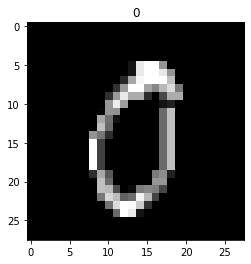

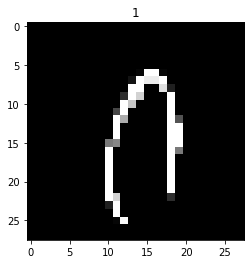

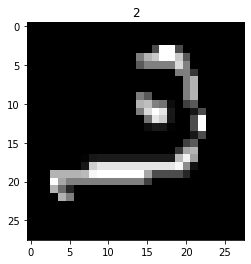

In [3]:
# function for plotting image from dataframe 
def show_img(img_info):
    gray_image = np.array(img_info[1:], dtype='uint8').reshape((28,28))
    
    # converting gray image into 3 channels RGB
    rgb_img = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB).astype('uint8')
    
    # plotting image
    plt.title(img_info['label'])
    plt.imshow(rgb_img)
    plt.show()
    
# showing images
for img in range(3):
    show_img(df.iloc[img, :])

# Build Models for Hyperparameter Evaluation

In [4]:
pipeline = Pipeline([('sd_scaler', StandardScaler()), ('SVM', SVC())])

parameters = [{'SVM__kernel': ['linear'], 
              'SVM__C':[0.01, 0.1, 1, 10]},
             {'SVM__kernel': ['poly'], 
              'SVM__C':[0.01, 0.1, 1, 10], 'SVM__gamma':[0.1, 1, 10]}]

grid = GridSearchCV(pipeline, param_grid=parameters, cv=5, n_jobs=-1, verbose = 10)


# Fit with GridSearch

In [5]:
grid.fit(features, label)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 85.8min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 119.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 151.3min
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed: 218.0min remaining: 17.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 226.4min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sd_scaler', StandardScaler()),
                                       ('SVM', SVC())]),
             n_jobs=-1,
             param_grid=[{'SVM__C': [0.01, 0.1, 1, 10],
                          'SVM__kernel': ['linear']},
                         {'SVM__C': [0.01, 0.1, 1, 10],
                          'SVM__gamma': [0.1, 1, 10],
                          'SVM__kernel': ['poly']}],
             verbose=10)

# Best Model Details

In [6]:
print("Validation Accuracy of Best Model = " + str(grid.best_score_))

print("Best Model Parameters = " + str(grid.best_params_))

best_model = grid.best_estimator_

Validation Accuracy of Best Model = 0.9733333333333333
Best Model Parameters = {'SVM__C': 0.01, 'SVM__gamma': 0.1, 'SVM__kernel': 'poly'}
